In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numpy import exp, sqrt, pi
from PIL import Image
import math

Part A

The maximum intensity in the image is: 255
Sigma: 102.0


(-0.5, 699.5, 699.5, -0.5)

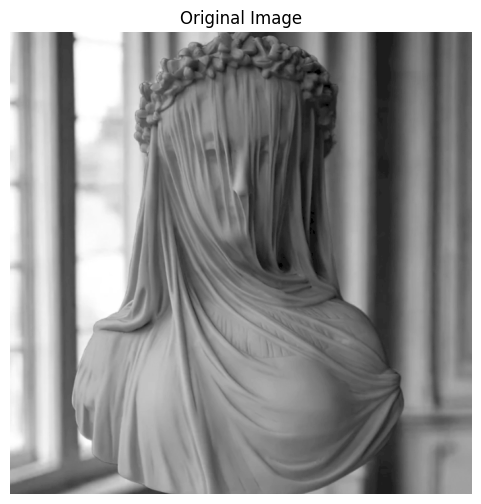

In [4]:
image = cv2.imread('pa7dtxbt.png', cv2.IMREAD_GRAYSCALE)
max_intensity = image.max()
print(f"The maximum intensity in the image is: {max_intensity}")
sigma=0.4*max_intensity
print("Sigma:", sigma)

plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')


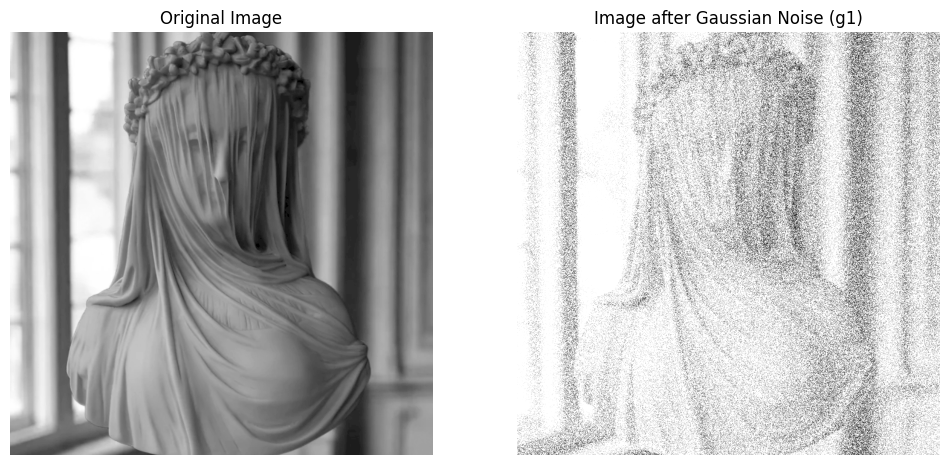

In [17]:
def AddGaussianNoise(image, mean=0, sigma=25):
    gauss = np.random.normal(mean, sigma, image.shape).astype('uint8')
    noisy_image = cv2.add(image, gauss)
    return noisy_image


ImageWithGaussianNoise=AddGaussianNoise(image, mean=0, sigma=sigma)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(ImageWithGaussianNoise, cmap='gray')
plt.title('Image after Gaussian Noise (g1)')
plt.axis('off')

plt.show()

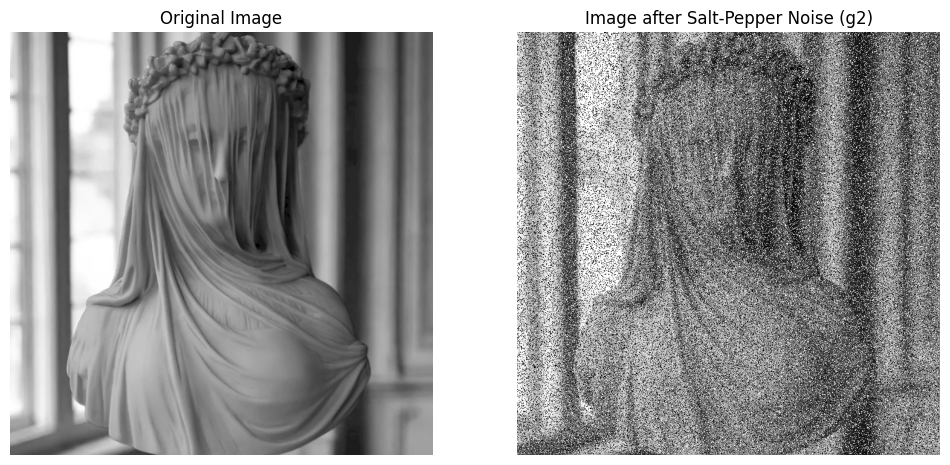

In [18]:
def AddSaltPepperNoise(image, Ps=0.2, Pb=0.2):
    noisy_image = np.copy(image)
    
    # Add salt noise (white pixels)
    num_salt = np.ceil(Ps * image.size)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 255

    # Add pepper noise (black pixels)
    num_pepper = np.ceil(Pb * image.size)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 0
    
    return noisy_image

SaltPaperNoise=AddSaltPepperNoise(image, Ps=0.2, Pb=0.2)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(SaltPaperNoise, cmap='gray')
plt.title('Image after Salt-Pepper Noise (g2)')
plt.axis('off')

plt.show()

Part B

In [10]:
def ApplyMeanFilter(image, w):
    padded_img = np.pad(image, pad_width=w//2, mode='constant', constant_values=0)
    filtered_img = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_img[i:i+w, j:j+w]
            filtered_img[i, j] = np.mean(region)
    return filtered_img

def ApplyMedianFilter(image, w):

    padded_img = np.pad(image, pad_width=w//2, mode='constant', constant_values=0)
    filtered_img = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_img[i:i+w, j:j+w]
            filtered_img[i, j] = np.median(region)
    
    return filtered_img

In [11]:
def CalculateMSE(image1, image2):
    assert image1.shape == image2.shape, "Check the dimension of both image same or not"
    mse = np.mean((image1 - image2) ** 2)
    return mse

Mean Filter with G1

In [21]:
def OptimizeMSE(images, points, apply_mean_filter, calculate_mse):
    MSE = np.zeros(len(points))
    Error = float('inf')
    MinMSEImag = None
    for i, point in enumerate(points):
        image2 = apply_mean_filter(images, point)
        error = calculate_mse(images, image2)
        MSE[i] = error
        if error < Error:
            Error = error
            MinMSEImag = image2

    return MSE, MinMSEImag



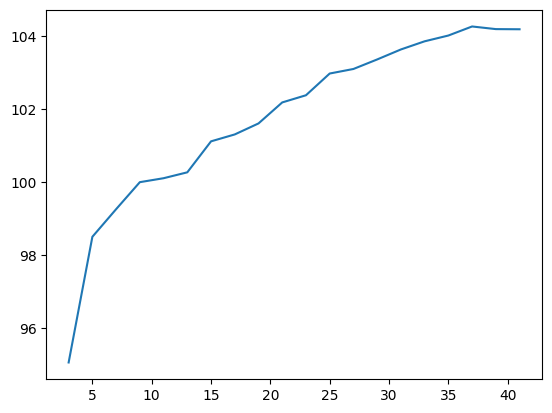

[ 95.04659388  98.49214898  99.24891429  99.98970204 100.09786327
 100.25944898 101.10867347 101.29821633 101.59946531 102.17559184
 102.37210204 102.96784286 103.09241633 103.35345306 103.62742041
 103.85101224 104.00945306 104.25752245 104.1854551  104.18112857]


(-0.5, 699.5, 699.5, -0.5)

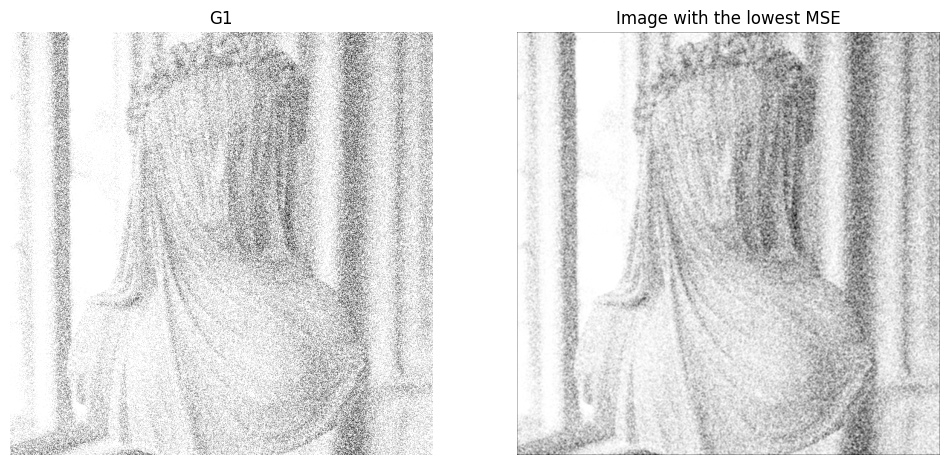

In [22]:
points = np.array([3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41])
MSE, MinMSEImag = OptimizeMSE(ImageWithGaussianNoise, points, ApplyMeanFilter, CalculateMSE)

plt.plot(points, np.array(MSE))
plt.show()

print(MSE)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(ImageWithGaussianNoise, cmap='gray')
plt.title('G1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(MinMSEImag, cmap='gray')
plt.title('Image with the lowest MSE')
plt.axis('off')

Medium Filter with G1

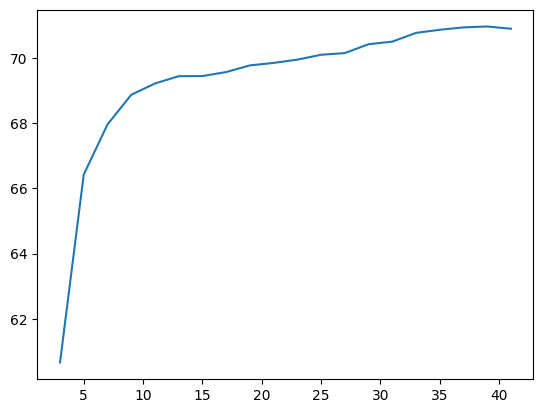

[60.66097347 66.42772041 67.96456122 68.87456122 69.2222102  69.44582041
 69.45034898 69.57283673 69.77754898 69.85366327 69.95381224 70.10351633
 70.15499184 70.4274102  70.50614286 70.7750102  70.8705     70.94360204
 70.97160408 70.90195714]


(-0.5, 699.5, 699.5, -0.5)

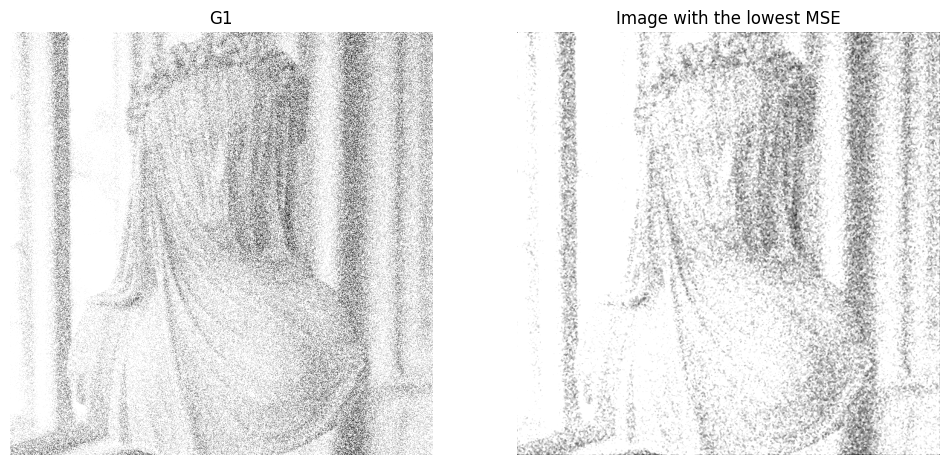

In [23]:
MSE2, MinMSEImag2 = OptimizeMSE(ImageWithGaussianNoise, points, ApplyMedianFilter, CalculateMSE)

plt.plot(points, np.array(MSE2))
plt.show()

print(MSE2)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(ImageWithGaussianNoise, cmap='gray')
plt.title('G1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(MinMSEImag2, cmap='gray')
plt.title('Image with the lowest MSE')
plt.axis('off')

Mean Filter with G2

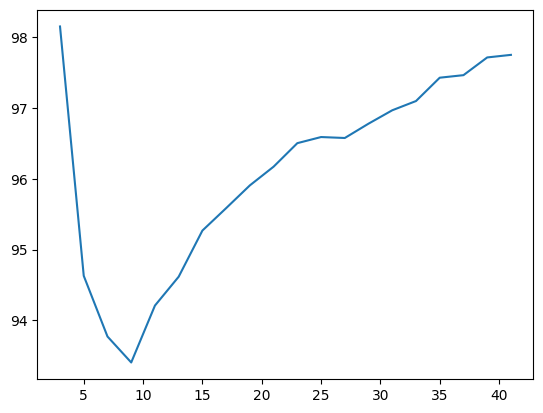

[98.15333061 94.6276551  93.76971429 93.40262245 94.20736531 94.61516735
 95.26772041 95.58481837 95.90670408 96.17112449 96.50360408 96.5900551
 96.57661429 96.77921224 96.96854898 97.09913265 97.42912245 97.46498776
 97.7155551  97.75187755]


(-0.5, 699.5, 699.5, -0.5)

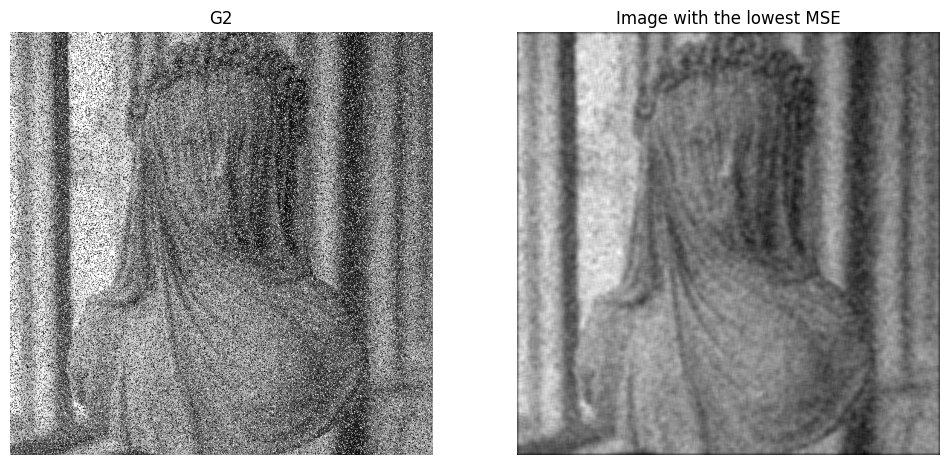

In [24]:
MSE3, MinMSEImag3 = OptimizeMSE(SaltPaperNoise, points, ApplyMeanFilter, CalculateMSE)

plt.plot(points, np.array(MSE3))
plt.show()

print(MSE3)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(SaltPaperNoise, cmap='gray')
plt.title('G2')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(MinMSEImag3, cmap='gray')
plt.title('Image with the lowest MSE')
plt.axis('off')

Median Filter with G2

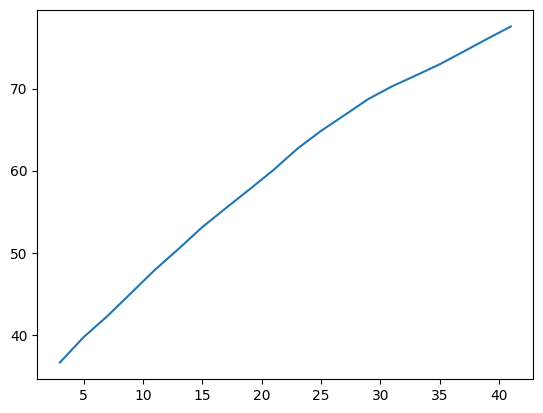

[36.6331     39.71751429 42.27892653 45.09045918 47.91085306 50.4709449
 53.12196735 55.45241429 57.74478163 60.08553878 62.66165918 64.84095306
 66.77732653 68.74112857 70.27783469 71.6002898  72.95479388 74.49450612
 76.05191633 77.56757143]


(-0.5, 699.5, 699.5, -0.5)

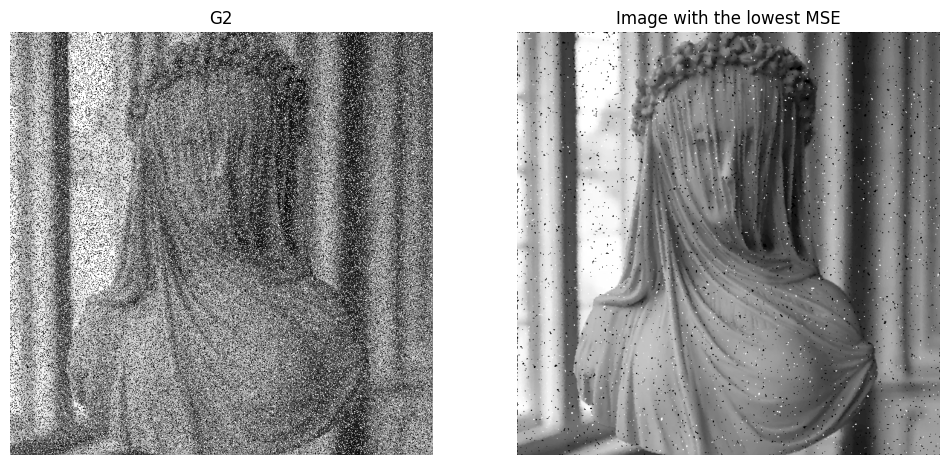

In [25]:
MSE4, MinMSEImag4 = OptimizeMSE(SaltPaperNoise, points, ApplyMedianFilter, CalculateMSE)


plt.plot(points, np.array(MSE4))
plt.show()

print(MSE4)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(SaltPaperNoise, cmap='gray')
plt.title('G2')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(MinMSEImag4, cmap='gray')
plt.title('Image with the lowest MSE')
plt.axis('off')

Part C

In [26]:
n1=ImageWithGaussianNoise - image
points =np.array([3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41])
MSE1 = []
MSE2 = []
MSE3 = []

for i in range(len(points)):
    image2=ApplyMeanFilter(image, points[i])
    image3=ApplyMeanFilter(n1, points[i])
    image4=ApplyMeanFilter(ImageWithGaussianNoise, points[i])

    MSE1.append(CalculateMSE(image, image2))
    MSE2.append(np.mean(image3**2))
    MSE3.append(CalculateMSE(image4, image))


(-0.5, 699.5, 699.5, -0.5)

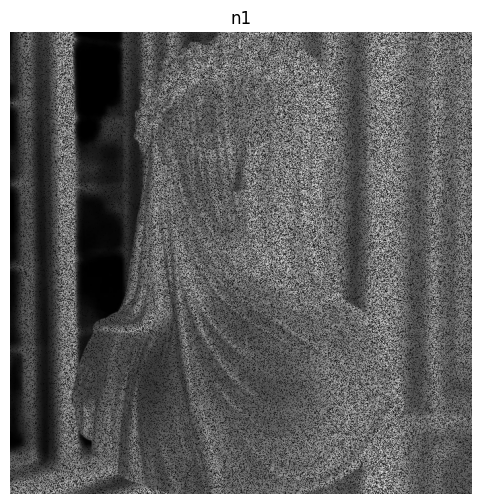

In [27]:
plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.imshow(n1, cmap='gray')
plt.title('n1')
plt.axis('off')

(-0.5, 699.5, 699.5, -0.5)

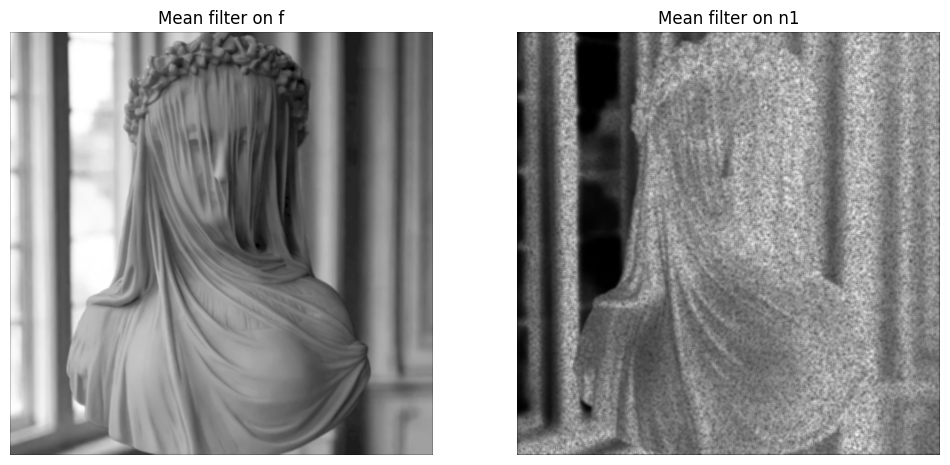

In [31]:
MeanFilterOnF = ApplyMeanFilter(image, 3)
MeanFilterOnN1 = ApplyMeanFilter(n1, 5)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(MeanFilterOnF, cmap='gray')
plt.title('Mean filter on f')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(MeanFilterOnN1, cmap='gray')
plt.title('Mean filter on n1')
plt.axis('off')

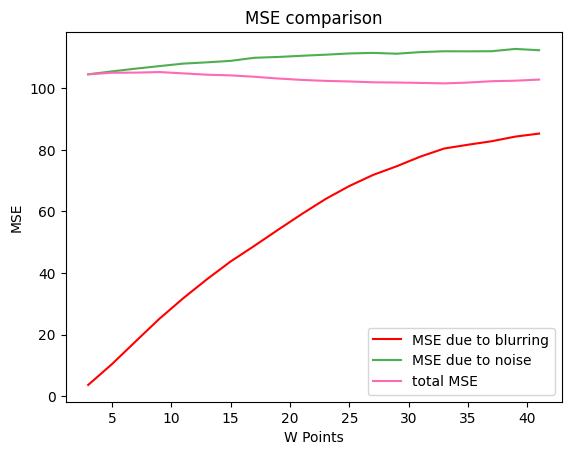

In [28]:
plt.plot(points, np.array(MSE1), color='r', label='MSE due to blurring')
plt.plot(points, np.array(MSE2), color='#4CAF50', label='MSE due to noise')
plt.plot(points, np.array(MSE3), color='hotpink', label='total MSE')

plt.legend()
plt.xlabel("W Points")
plt.ylabel("MSE")
plt.title("MSE comparison")
plt.show()